In [268]:
from importlib import reload
import board
import snake
reload(board)
reload(snake)
from board import GeneralBoard
from snake import Snake

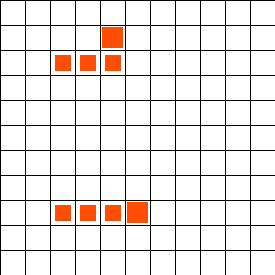

In [269]:
sample_game_state = {"game": {"id": "d76a05f5-e961-4523-807f-2d5e5825cd95", "ruleset": {"name": "standard", "version": "cli", "settings": {"foodSpawnChance": 15, "minimumFood": 1, "hazardDamagePerTurn": 14, "hazardMap": "", "hazardMapAuthor": "", "royale": {"shrinkEveryNTurns": 25}, "squad": {"allowBodyCollisions": False, "sharedElimination": False, "sharedHealth": False, "sharedLength": False}}}, "map": "standard", "timeout": 500, "source": ""}, "turn": 7, "board": {"height": 11, "width": 11, "snakes": [{"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "8", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}, {"id": "8e15dfcc-fe37-4484-a946-62ff1430f6ac", "name": "Team 1 Snake 2", "latency": "8", "health": 95, "body": [{"x": 5, "y": 8}, {"x": 4, "y": 8}, {"x": 3, "y": 8}, {"x": 2, "y": 8}], "head": {"x": 5, "y": 8}, "length": 4, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}], "food": [{"x": 5, "y": 5}, {"x": 10, "y": 10}], "hazards": []}, "you": {"id": "f5397cbd-611f-47bc-96fd-7ca72e543bef", "name": "Team 1 Snake 1", "latency": "0", "health": 100, "body": [{"x": 4, "y": 1}, {"x": 4, "y": 2}, {"x": 3, "y": 2}, {"x": 2, "y": 2}, {"x": 2, "y": 2}], "head": {"x": 4, "y": 1}, "length": 5, "shout": "", "squad": "", "customizations": {"color": "#ff4e03", "head": "default", "tail": "default"}}}
board = GeneralBoard(11, 11)
snake1 = Snake(sample_game_state["board"]["snakes"][0]["id"])
snake2 = Snake(sample_game_state["board"]["snakes"][1]["id"])
snake1.place_on_board(board)
snake2.place_on_board(board)
snake1.update_state(sample_game_state["board"]["snakes"][0])
snake2.update_state(sample_game_state["board"]["snakes"][1])
board

[Cell(4, 1), Cell(4, 2), Cell(3, 2), Cell(2, 2)]
False
[<snake.Snake object at 0x000001FE37DA8A50>, <snake.Snake object at 0x000001FE37ED6D50>]


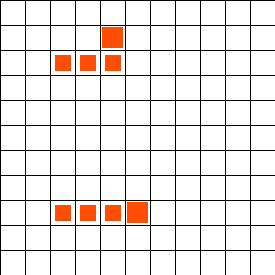

In [270]:
new_board = board.copy()
new_board

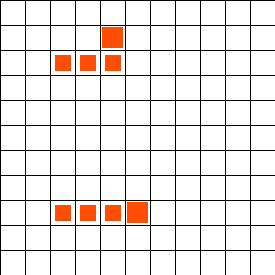

In [271]:
subboards = board.get_possible_subboards()
[(c.x, c.y) for c in subboards[0].snakes[1].body]
subboards[0]